# House Prices: Advanced Regression Techniques

## Kaggle Practice Skills

    - Creative feature engineering 
    - Advanced regression techniques like random forest and gradient boosting

Data source
    - https://www.kaggle.com/c/house-prices-advanced-regression-techniques#evaluation

References

    - [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book)

Feature engineering: select meaningful features (reduce overfitting)

    1. L1 regularization
        - Supported Models:
            - Logistic Regression
    2. Feature selection
        - Sequential Backward Selection (SBS), not supported in sklearn, maybe use [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
        - [sklearn supports](http://scikit-learn.org/stable/modules/feature_selection.html):
            - Removing low variance models
            - Univariate feature selection
            - Recursive feature elimination
            - Feature selection using SelectFromModel
                - Random forest
    3. Feature extraction
            - [Linear, Unsupervised] Principal component analysis (PCA)
            - [Linear, Supervised] Linear Discriminant Analysis (LDA)
            - Nonlinear dimensionality reduction
                - kernel principal component analysis (kernel PCA)
                - more advanced in sklearn: http://scikit-learn.org/stable/modules/manifold.html


# Let's start

## Data Preparation

### Import Modules

In [2982]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

### Import Data

In [2983]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
datasets = [train, test]
complete = pd.concat(datasets)
complete.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


### Describe Data

In [2984]:
train.info()
print('-' * 40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2985]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [2986]:
test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [2987]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [2988]:
train.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [2989]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Data Insights

#### MSZoning

    - Categorical
    - Should be ordinal, create ordinal mapping
    - Fill NaN with most frequent 'RL'

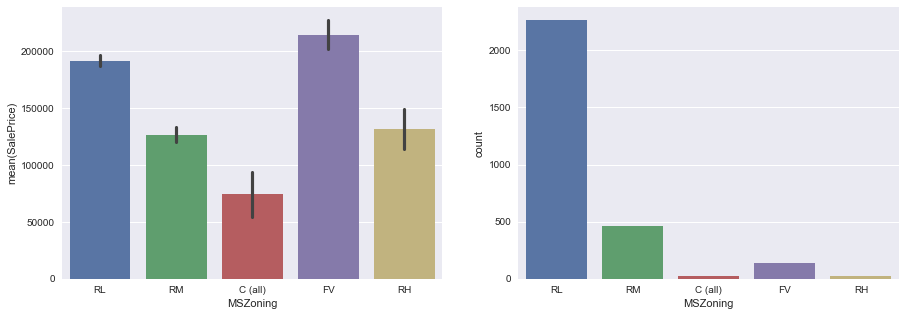

In [2990]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='MSZoning',
    y='SalePrice',
    data=complete,
    ax=ax1
)
sns.countplot(
    x='MSZoning',
    data=complete,
    ax=ax2
)

In [2991]:
mszoning_map = {
    'C (all)': 0,
    'RM': 1,
    'RH': 2,
    'RL': 3,
    'FV': 4
}

#### Street

    - Categorical
    - Binary Nominal
    - Create mapping

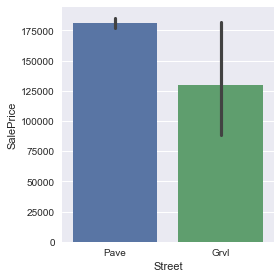

In [2992]:
sns.factorplot(
    x='Street',
    y='SalePrice',
    data=train,
    kind='bar'
)

In [2993]:
street_map = {
    'Grvl': 0,
    'Pave': 1
}

#### Alley

    - Categorical
    - Nominal
    - Lots of NaN values, use dummies

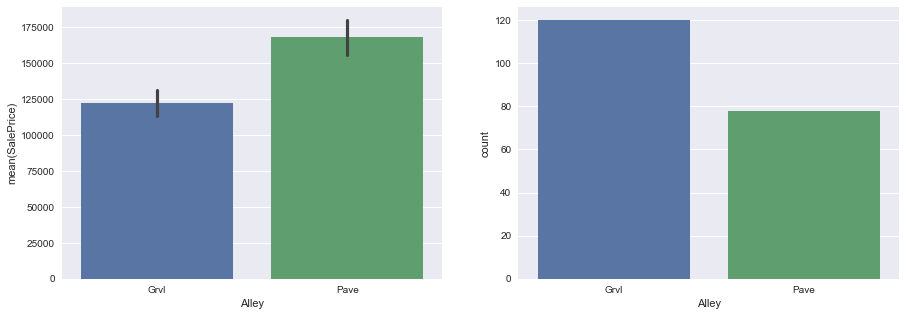

In [2994]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Alley',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Alley',
    data=complete,
    ax=ax2
)

#### LotShape

    - Categorical
    - Nominal
    - Use dummies

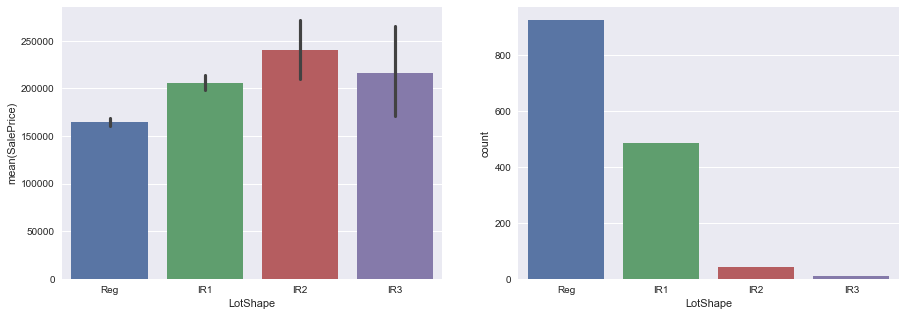

In [2995]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='LotShape',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='LotShape',
    data=train,
    ax=ax2
)

#### LandContour

    - Categorical
    - Nominal
    - Use dummies

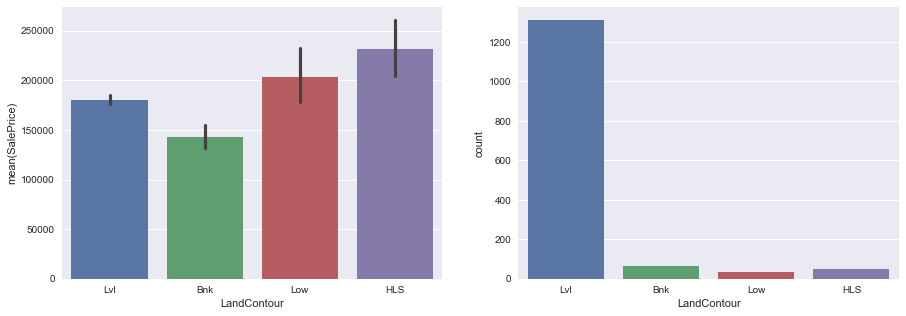

In [2996]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='LandContour',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='LandContour',
    data=train,
    ax=ax2
)

#### Utilities

    - Categorical
    - Binary, should be ordinal
    - Use mapping
    - fill NaN with most frequent value

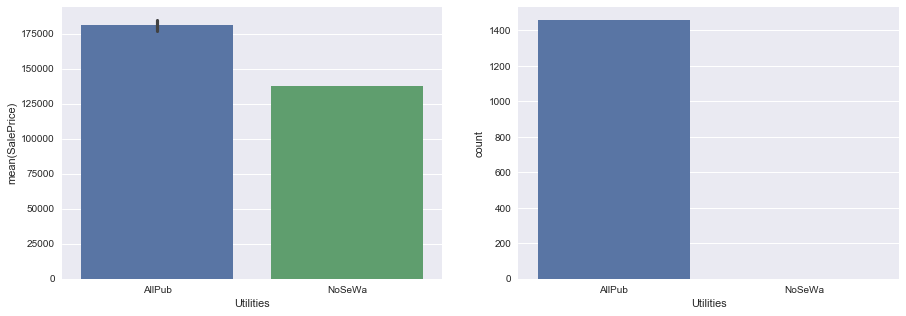

In [2997]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Utilities',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Utilities',
    data=train,
    ax=ax2
)

In [2998]:
utilities_map = {
    'NoSeWa': 0,
    'AllPub': 1
}

#### LotConfig

    - Categorical
    - Nominal
    - Group those are not 'Corner' and 'Inside' as 'others'
    - Use dummies

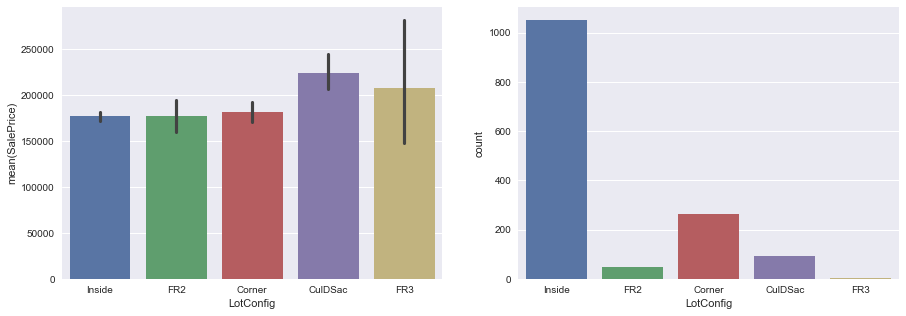

In [2999]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='LotConfig',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='LotConfig',
    data=train,
    ax=ax2
)

In [3000]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['LotConfig'] != 'Inside') & (dataset['LotConfig'] != 'Corner'),
        'LotConfig'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### LandSlope

    - Categorical
    - Nominal
    - Group those are not 'Gtl' as 'others', make it binary
    - Use mapping

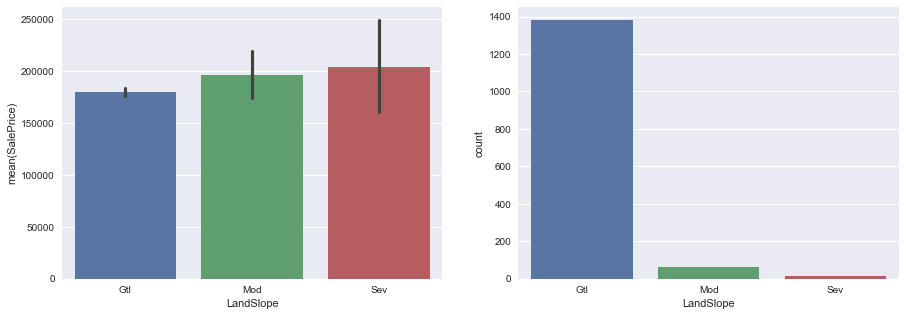

In [3001]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='LandSlope',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='LandSlope',
    data=train,
    ax=ax2
)

In [3002]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['LandSlope'] != 'Gtl'),
        'LandSlope'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3003]:
landslope_map = {
    'Gtl': 1,
    'others': 0
}

#### Neighborhood

    - Categorical
    - Should be Ordinal
    - Use mapping

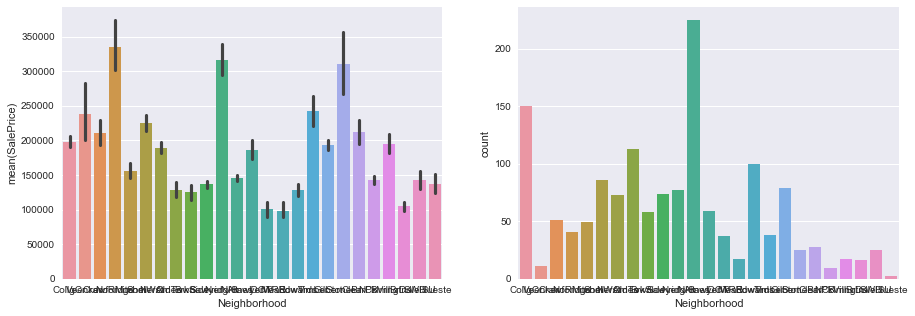

In [3004]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Neighborhood',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Neighborhood',
    data=train,
    ax=ax2
)

In [3005]:
neighborsale = train[['Neighborhood', 'SalePrice']].groupby(['Neighborhood'], as_index=False).mean().sort_values(by='SalePrice', ascending=False)
neighborsale.index = range(25, 0, -1)
neighborsale = neighborsale.drop('SalePrice', axis=1)
neighborhood_map = {v: k for k, v in neighborsale.to_dict()['Neighborhood'].items()}
neighborhood_map

{'Blmngtn': 16,
 'Blueste': 8,
 'BrDale': 3,
 'BrkSide': 4,
 'ClearCr': 19,
 'CollgCr': 17,
 'Crawfor': 18,
 'Edwards': 5,
 'Gilbert': 15,
 'IDOTRR': 2,
 'MeadowV': 1,
 'Mitchel': 12,
 'NAmes': 11,
 'NPkVill': 10,
 'NWAmes': 14,
 'NoRidge': 25,
 'NridgHt': 24,
 'OldTown': 6,
 'SWISU': 9,
 'Sawyer': 7,
 'SawyerW': 13,
 'Somerst': 20,
 'StoneBr': 23,
 'Timber': 22,
 'Veenker': 21}

#### Condition1 / Condition2

    - Categorical
    - Nominal
    - Manually combine two conditions into dummies, ignore in process data first

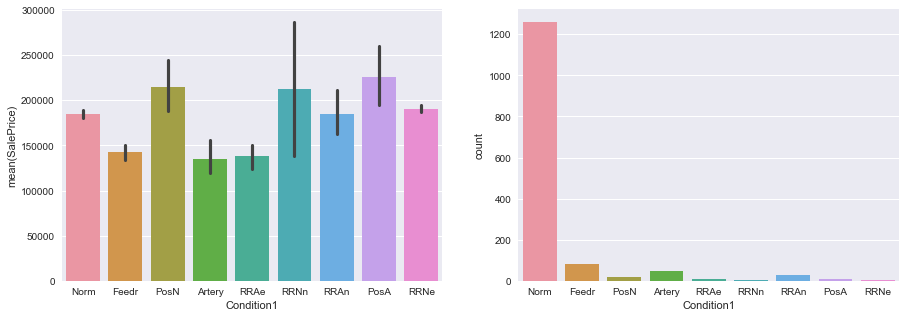

In [3006]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Condition1',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Condition1',
    data=train,
    ax=ax2
)

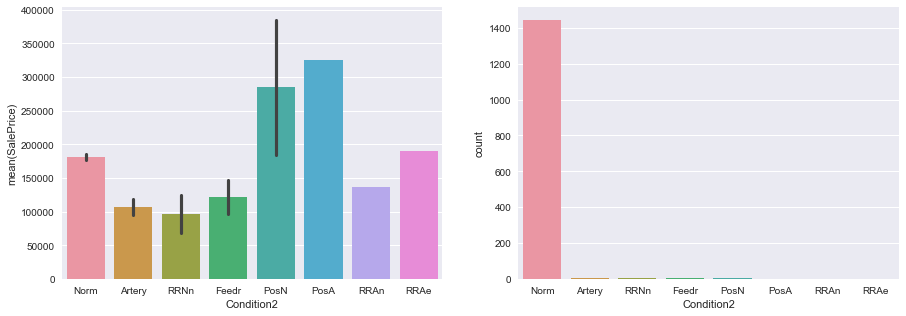

In [3007]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Condition2',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Condition2',
    data=train,
    ax=ax2
)

#### BldgType

    - Categorical
    - Nominal
    - Group those are not '1Fam' into 'others', make it binary
    - Use mapping

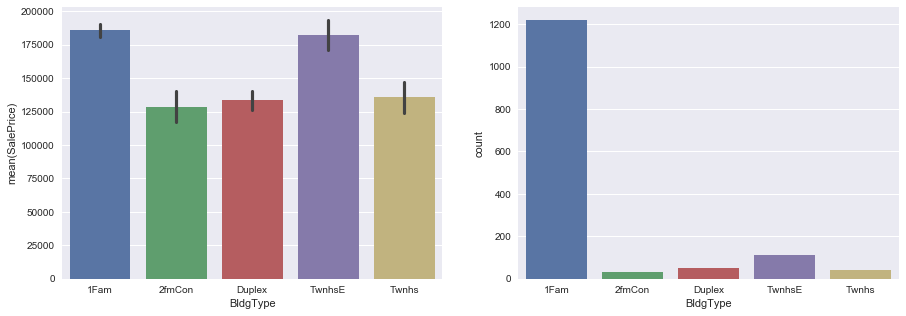

In [3008]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BldgType',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BldgType',
    data=train,
    ax=ax2
)

In [3009]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['BldgType'] != '1Fam'),
        'BldgType'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3010]:
bldgtype_map = {
    '1Fam': 1,
    'others': 0
}

#### HouseStyle

    - Categorical
    - Nominal
    - Group those are not '1.5Fin', '1Story', '2Story' into 'others'
    - Use dummies

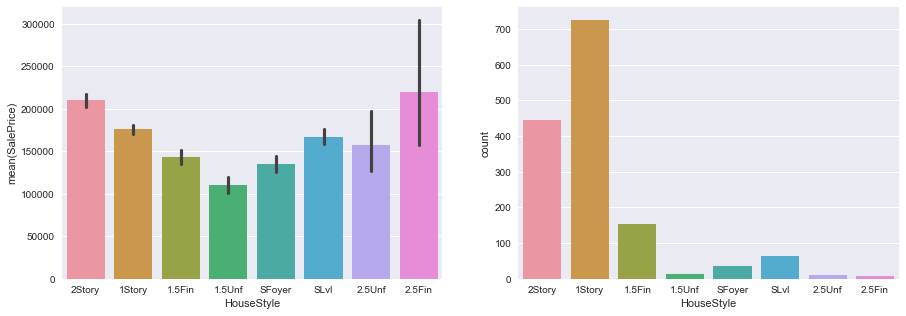

In [3011]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='HouseStyle',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='HouseStyle',
    data=train,
    ax=ax2
)

In [3012]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['HouseStyle'] != '2Story') & (dataset['HouseStyle'] != '1Story') & (dataset['HouseStyle'] != '1.5Fin'),
        'HouseStyle'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### RoofStyle

    - Categorial
    - Nominal
    - Group those are not 'Gable', 'Hip', into 'others'
    - Use dummies

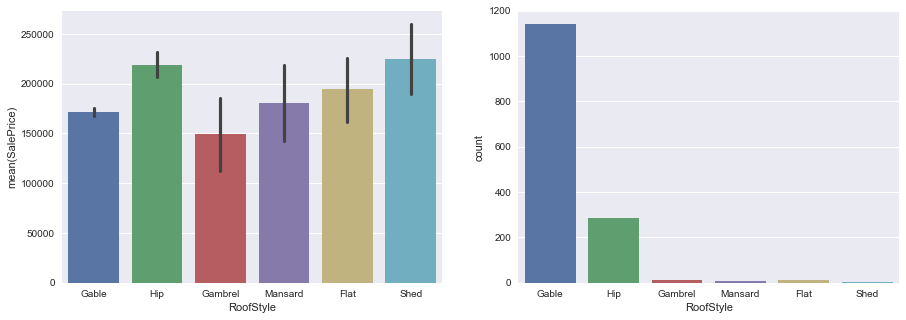

In [3013]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='RoofStyle',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='RoofStyle',
    data=train,
    ax=ax2
)

In [3014]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['RoofStyle'] != 'Gable') & (dataset['RoofStyle'] != 'Hip'),
        'RoofStyle'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### RoofMatl

    - Categorial
    - Nominal
    - Group those are not 'CompShg' into 'others', make it binary
    - Use mapping

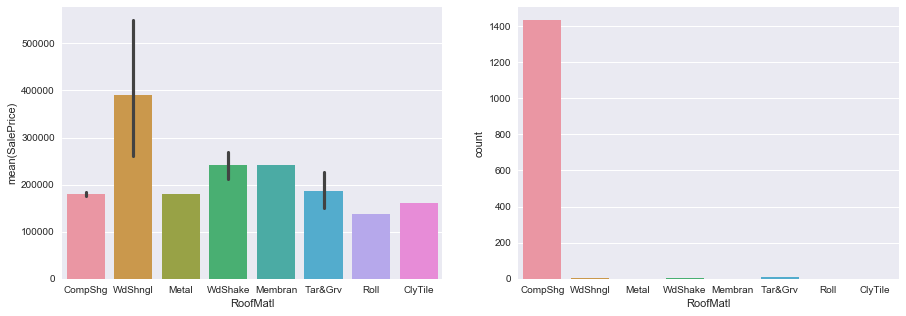

In [3015]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='RoofMatl',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='RoofMatl',
    data=train,
    ax=ax2
)

In [3016]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['RoofMatl'] != 'CompShg'),
        'RoofMatl'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3017]:
roofmatl_map = {
    'CompShg': 1,
    'others': 0
}

#### Exterior1st / Exterior2nd

    - Categorial
    - Nominal
    - Manually combine two conditions into dummies
    - fill NaN with most frequent

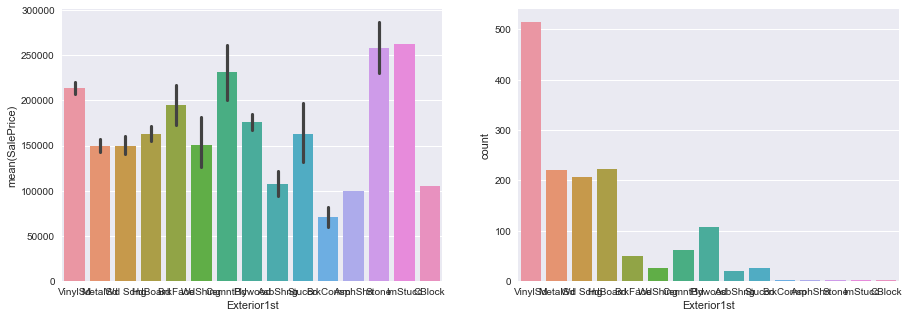

In [3018]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Exterior1st',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Exterior1st',
    data=train,
    ax=ax2
)

#### MasVnrType

    - Categorial
    - Nominal
    - fill NaN with most frequent
    - Use dummies

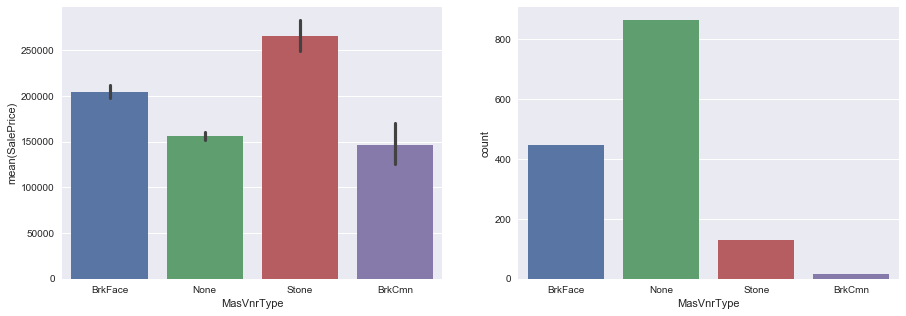

In [3019]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='MasVnrType',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='MasVnrType',
    data=train,
    ax=ax2
)

#### MasVnrArea
    - Numerical
    - first check if fill with 0 for MasVnrType is 'None'
    - fill NaN with median

In [3020]:
train.loc[(train['MasVnrType'] == 'None') & (train['MasVnrArea'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [3021]:
test.loc[(test['MasVnrType'] == 'None') & (test['MasVnrArea'].isnull())]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


#### ExterQual / ExterCond

    - Categorical
    - Ordinal
    - Use mapping

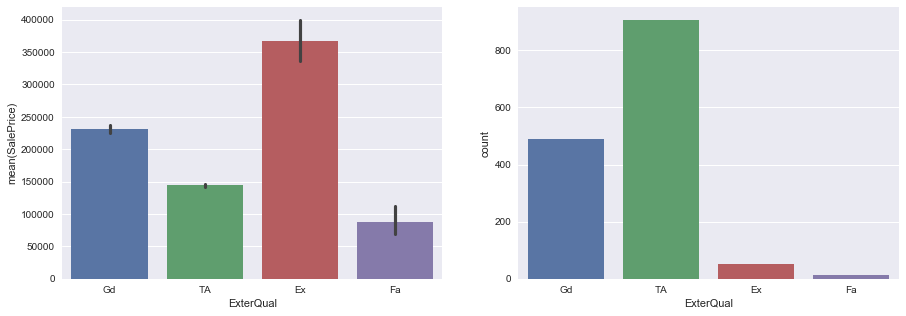

In [3022]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='ExterQual',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='ExterQual',
    data=train,
    ax=ax2
)

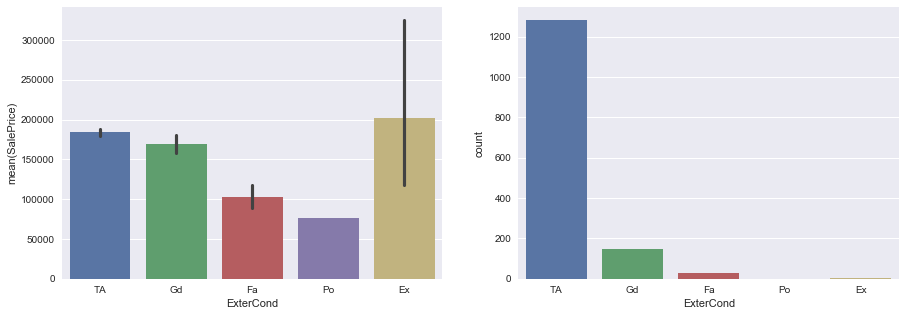

In [3023]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='ExterCond',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='ExterCond',
    data=train,
    ax=ax2
)

In [3024]:
exter_map = {
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

#### Foundation

    - Categorical
    - Nominal
    - Use dummies

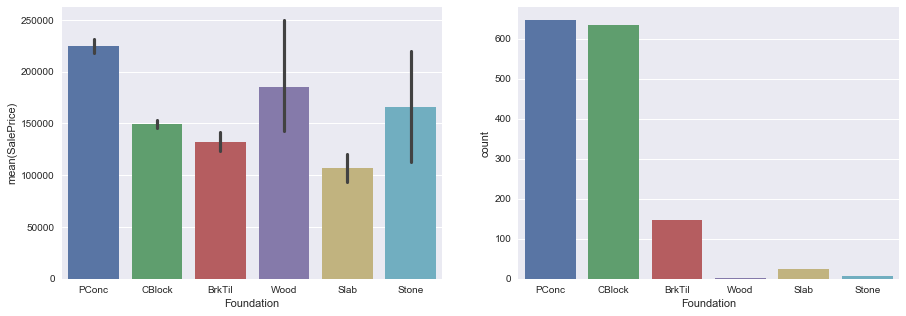

In [3025]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Foundation',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Foundation',
    data=train,
    ax=ax2
)

In [3026]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['Foundation'] != 'PConc') & (dataset['Foundation'] != 'CBlock') & (dataset['Foundation'] != 'BrkTil'),
        'Foundation'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### BsmtQual / BsmtCond

    - Categorical
    - Ordinal
    - Use mapping
    - fill NaN with 'NA', no basement

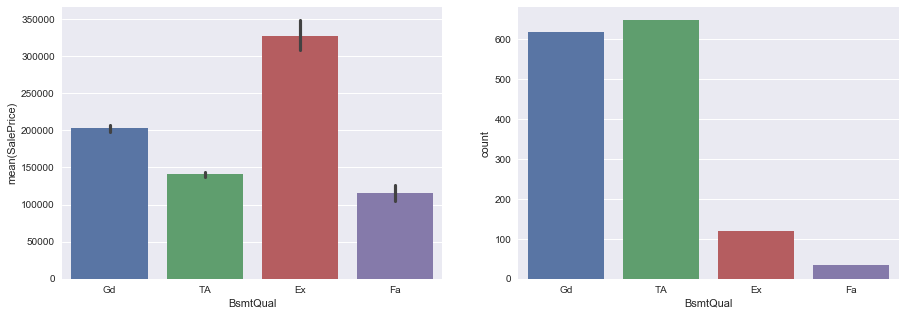

In [3027]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BsmtQual',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtQual',
    data=train,
    ax=ax2
)

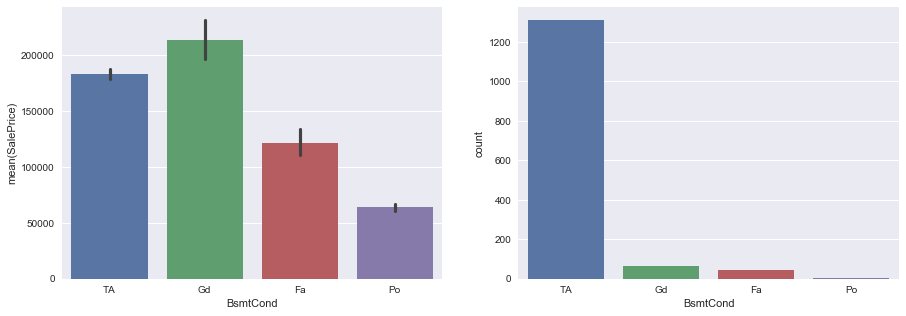

In [3028]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BsmtCond',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtCond',
    data=train,
    ax=ax2
)

In [3029]:
train['BsmtQual'].fillna('NA', inplace=True)
test['BsmtQual'].fillna('NA', inplace=True)
train['BsmtCond'].fillna('NA', inplace=True)
test['BsmtCond'].fillna('NA', inplace=True)
datasets = [train, test]
complete = pd.concat(datasets)

# np.nan != np.nan, so replace with 'NA' first

bsmt_map = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

#### BsmtExposure

    - Categorical
    - Ordinal
    - Use mapping
    - fill NaN with 'NA', no basement

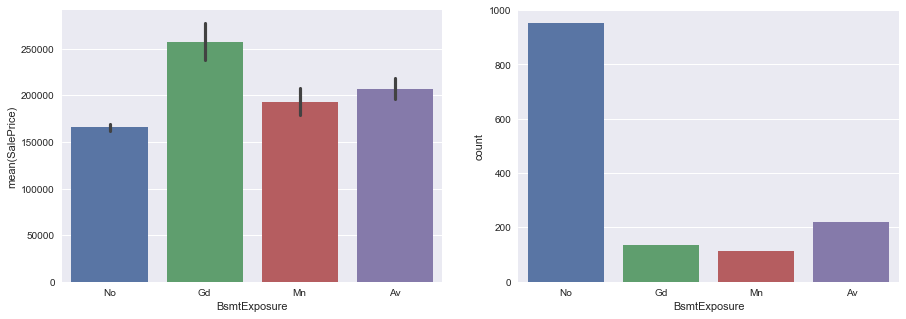

In [3030]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BsmtExposure',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtExposure',
    data=train,
    ax=ax2
)

In [3031]:
train['BsmtExposure'].fillna('NA', inplace=True)
test['BsmtExposure'].fillna('NA', inplace=True)
datasets = [train, test]
complete = pd.concat(datasets)

# np.nan != np.nan, so replace with 'NA' first

bsmtexposure_map = {
    'NA': 0,
    'No': 1,
    'Mn': 2,
    'Av': 3,
    'Gd': 4
}

#### BsmtFinSF1 / BsmtFinType1 / BsmtFinSF2 / BsmtFinType2 / BsmtUnfSF

    - Categorical (ordinal) / Numerical
    - manually combine the first four into one feature 'BsmtFinScore' after data processing
    - fill NaN values with 'NA'
    - use mapping

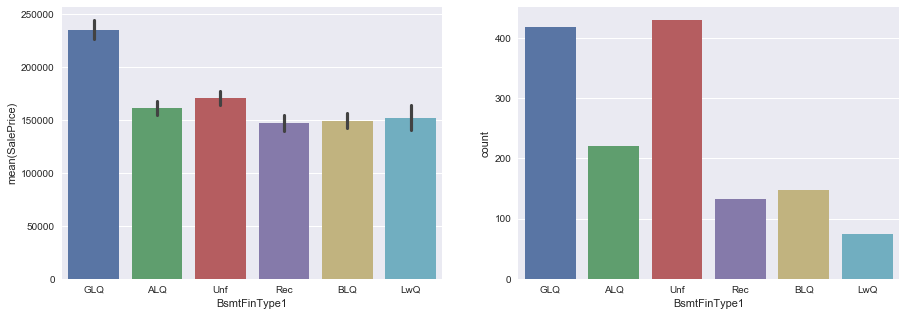

In [3032]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BsmtFinType1',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtFinType1',
    data=train,
    ax=ax2
)

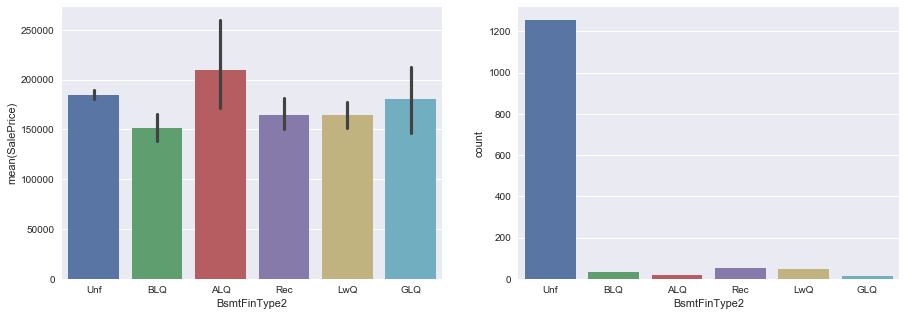

In [3033]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='BsmtFinType2',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtFinType2',
    data=train,
    ax=ax2
)

In [3034]:
train['BsmtFinType1'].fillna('NA', inplace=True)
test['BsmtFinType1'].fillna('NA', inplace=True)
train['BsmtFinType2'].fillna('NA', inplace=True)
test['BsmtFinType2'].fillna('NA', inplace=True)

test['BsmtFinSF1'].fillna(0.0, inplace=True)
test['BsmtFinSF2'].fillna(0.0, inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

# np.nan != np.nan, so replace with 'NA' first

bsmtfintype_map = {
    'NA': 0,
    'Unf': 1,
    'LwQ': 2,
    'Rec': 3,
    'BLQ': 4,
    'ALQ': 5,
    'GLQ': 6
}

#### TotalBsmtSF

    - Numerical
    - fill NaN with zero, no basement

In [3035]:
test['TotalBsmtSF'].fillna(0.0, inplace=True)

#### Heating

    - Categorinal
    - Nominal
    - Combine heating with less counts as 'others'
    - use dummies

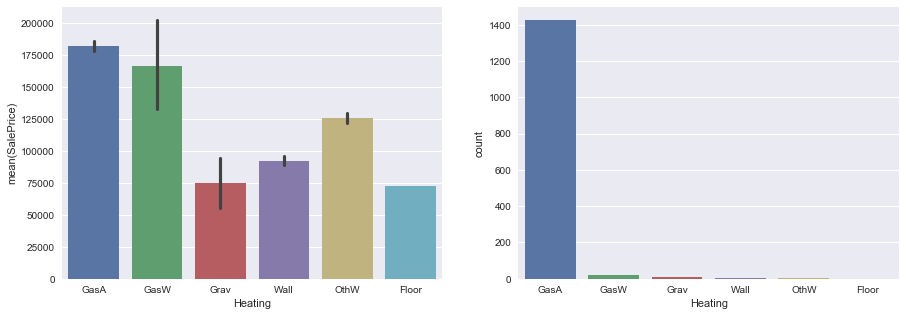

In [3036]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(
    x='Heating',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Heating',
    data=train,
    ax=ax2
)

In [3037]:
for dataset in datasets:
    
    dataset.loc[(dataset['Heating'] != 'GasA'), 'Heating'] = 'others'

datasets = [train, test]
complete = pd.concat(datasets)

In [3038]:
heating_map = {
    'GasA': 1,
    'others': 0
}

#### HeatingQC

    - Categorinal
    - Ordinal
    - use mapping

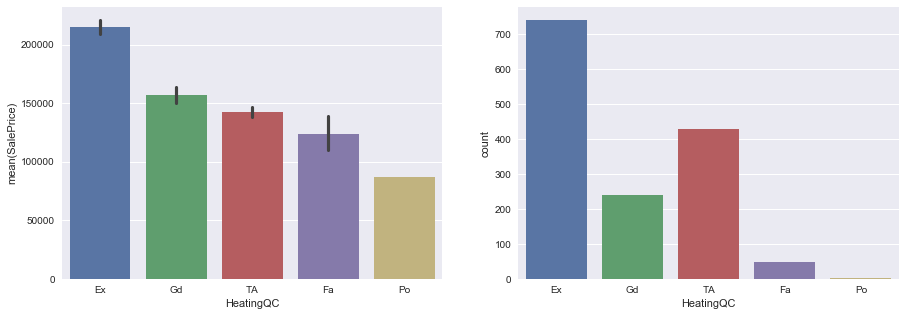

In [3039]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='HeatingQC',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='HeatingQC',
    data=train,
    ax=ax2
)

In [3040]:
heatingqc_map = {
    'Po': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

#### CentralAir

    - Categorinal
    - Binary, nominal
    - use mapping

In [3041]:
centralair_map = {
    'N': 0,
    'Y': 1
}

#### Electrical

    - Categorinal
    - Nominal
    - combine value other than 'SBrkr' into 'others' and make it binary
    - use mapping

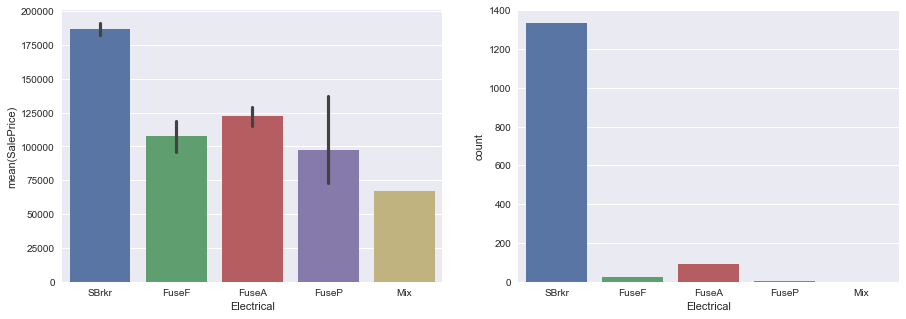

In [3042]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='Electrical',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Electrical',
    data=train,
    ax=ax2
)

In [3043]:
for dataset in datasets:
    
    dataset.loc[(dataset['Electrical'] != 'SBrkr'), 'Electrical'] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3044]:
electrical_map = {
    'SBrkr': 1,
    'others': 0
}

#### BsmtFullBath / BsmtHalfBath

    - Categorinal
    - Ordinal
    - fill NaN with most frequent

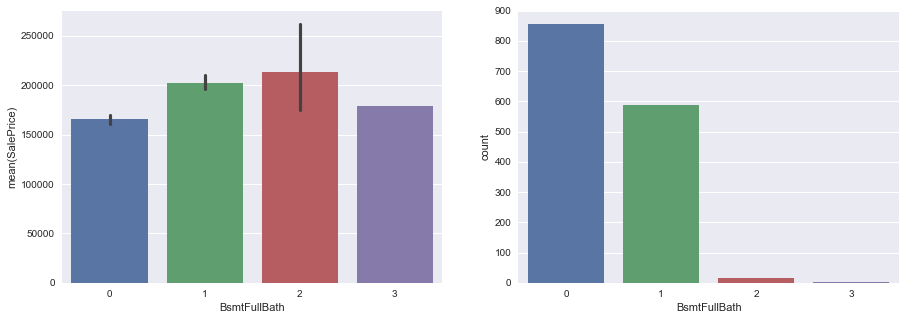

In [3045]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='BsmtFullBath',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtFullBath',
    data=train,
    ax=ax2
)

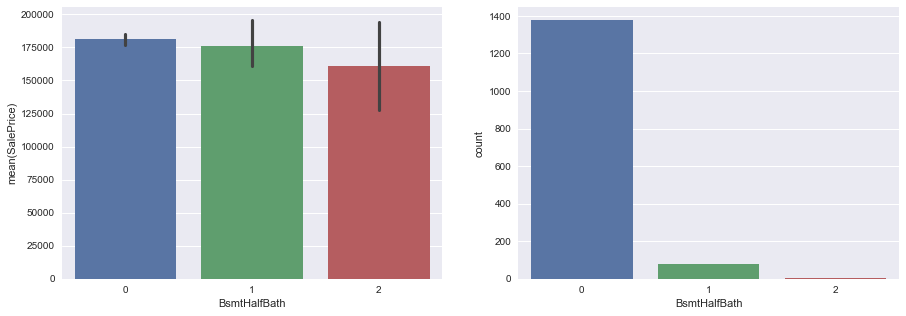

In [3046]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='BsmtHalfBath',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='BsmtHalfBath',
    data=train,
    ax=ax2
)

#### KitchenQual

    - Categorinal
    - Ordinal
    - use mapping

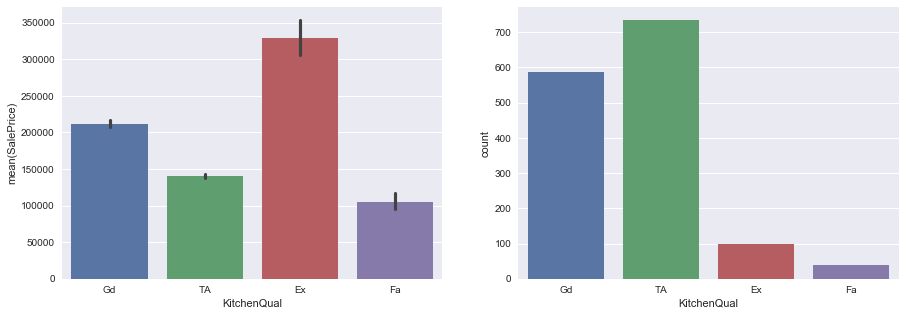

In [3047]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='KitchenQual',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='KitchenQual',
    data=train,
    ax=ax2
)

In [3048]:
train['KitchenQual'].fillna('NA', inplace=True)
test['KitchenQual'].fillna('NA', inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

In [3049]:
kitchenqual_map = {
    'NA': 0,
    'Fa': 1,
    'TA': 2,
    'Gd': 3,
    'Ex': 4
}

#### Functional

    - Categorinal
    - Ordinal
    - Combine those are not 'Typ' into 'others'
    - fill NaN with 'others'
    - use mapping

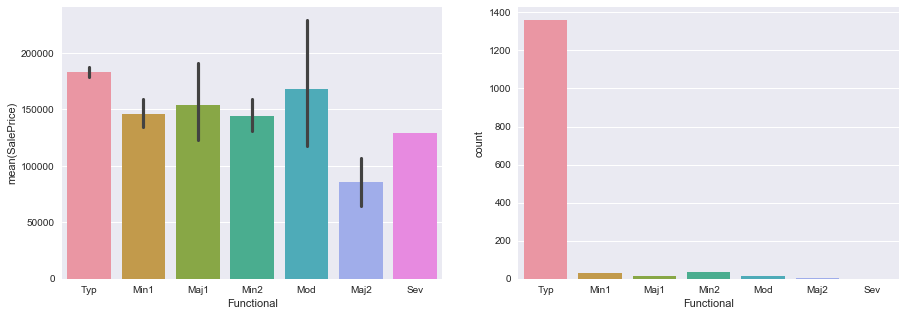

In [3050]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='Functional',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Functional',
    data=train,
    ax=ax2
)

In [3051]:
for dataset in datasets:
    
    dataset.loc[(dataset['Functional'] != 'Typ'), 'Functional'] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3052]:
functional_map = {
    'Typ': 1,
    'others': 0
}

#### FireplaceQu

    - Categorinal
    - Ordinal
    - use mapping

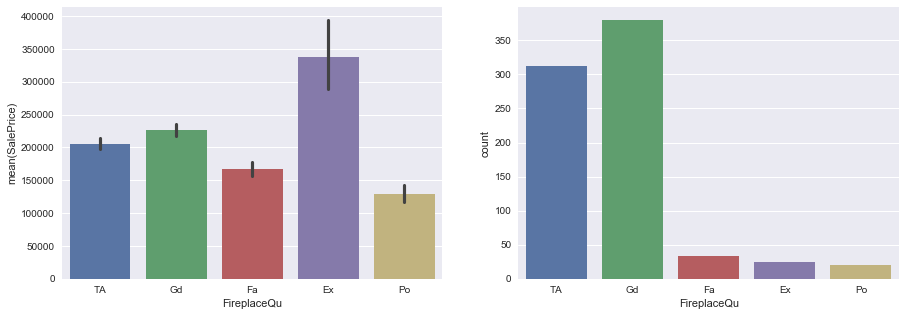

In [3053]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='FireplaceQu',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='FireplaceQu',
    data=train,
    ax=ax2
)

In [3054]:
train['FireplaceQu'].fillna('NA', inplace=True)
test['FireplaceQu'].fillna('NA', inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

In [3055]:
fireplacequ_map = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

#### GarageType

    - Categorinal
    - Nominal
    - combine types with smaller counts into 'others'
    - use dummies

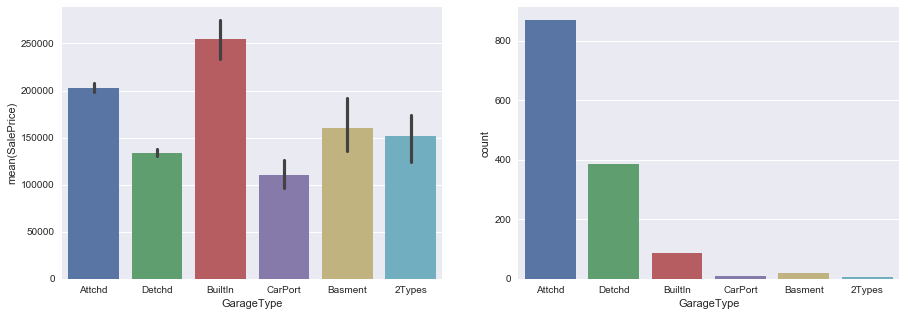

In [3056]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='GarageType',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='GarageType',
    data=train,
    ax=ax2
)

In [3057]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['GarageType'] != 'Attchd') & (dataset['GarageType'] != 'Detchd') & ~(dataset['GarageType'].isnull()),
        'GarageType'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### GarageYrBlt

    - Numerical
    - fill NaN with clearly out of range -1

#### GarageFinish

    - Categorical
    - Ordinal
    - use mappings

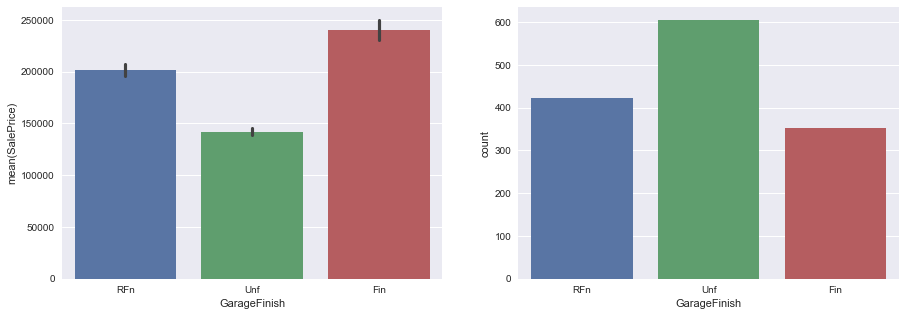

In [3058]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='GarageFinish',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='GarageFinish',
    data=train,
    ax=ax2
)

In [3059]:
train['GarageFinish'].fillna('NA', inplace=True)
test['GarageFinish'].fillna('NA', inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

In [3060]:
garagefinish_map = {
    'NA': 0,
    'Unf': 1,
    'RFn': 2,
    'Fin': 3
}

#### GarageCars / GarageArea

    - Numerical
    - fill NaN with 0

In [3061]:
train['GarageCars'].fillna(0, inplace=True)
test['GarageCars'].fillna(0, inplace=True)

train['GarageArea'].fillna(0, inplace=True)
test['GarageArea'].fillna(0, inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

#### GarageQual / GarageCond

    - Categorical
    - Ordinal
    - Use mapping

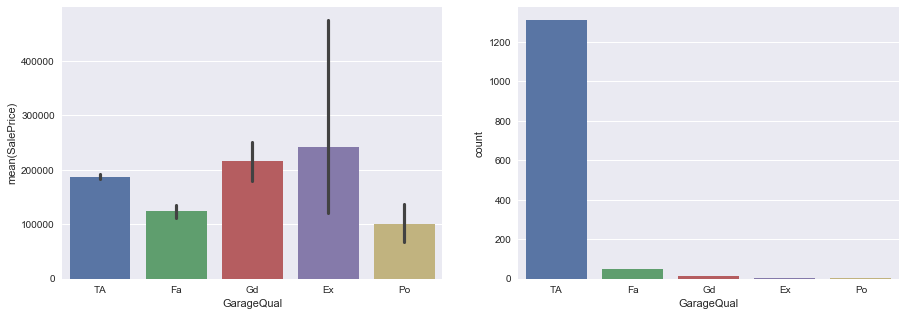

In [3062]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='GarageQual',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='GarageQual',
    data=train,
    ax=ax2
)

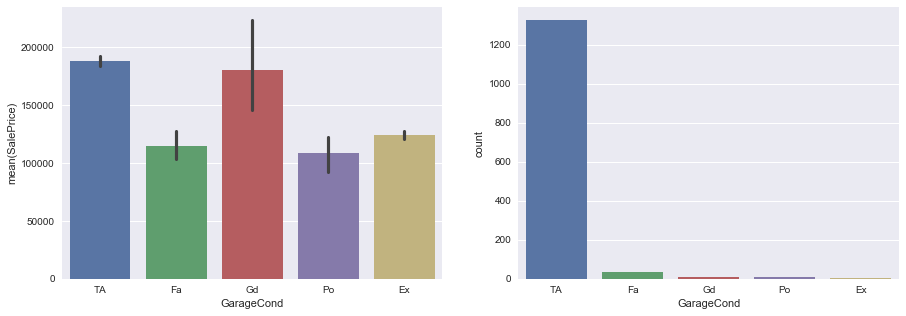

In [3063]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='GarageCond',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='GarageCond',
    data=train,
    ax=ax2
)

In [3064]:
train['GarageQual'].fillna('NA', inplace=True)
test['GarageQual'].fillna('NA', inplace=True)

train['GarageCond'].fillna('NA', inplace=True)
test['GarageCond'].fillna('NA', inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

In [3065]:
garage_map = {
    'NA': 0,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5
}

#### PavedDrive

    - Categorical
    - Should be ordinal
    - Use mapping

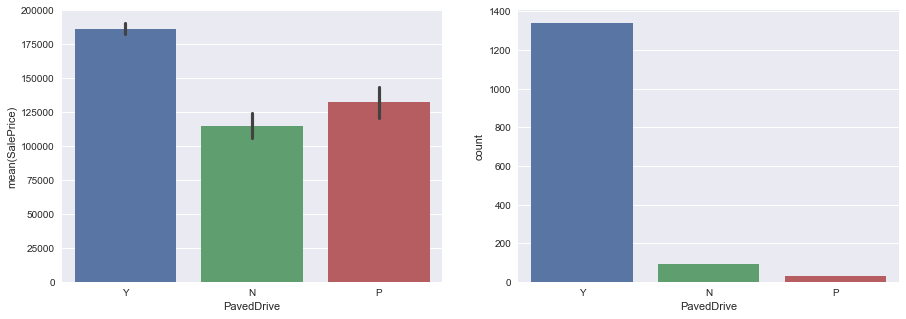

In [3066]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='PavedDrive',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='PavedDrive',
    data=train,
    ax=ax2
)

In [3067]:
paveddrive_map = {
    'N': 0,
    'P': 1,
    'Y': 2
}

#### PoolQC

    - Categorical
    - Ordinal
    - Use mapping

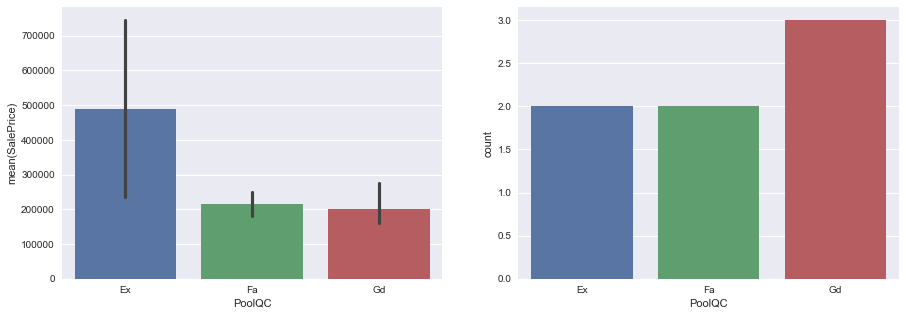

In [3068]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='PoolQC',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='PoolQC',
    data=train,
    ax=ax2
)

In [3069]:
train['PoolQC'].fillna('NA', inplace=True)
test['PoolQC'].fillna('NA', inplace=True)

datasets = [train, test]
complete = pd.concat(datasets)

In [3070]:
poolqc_map = {
    'NA': 0,
    'Fa': 1,
    'Gd': 2,
    'Ex': 3
}

#### Fence

    - Categorical
    - Nominal
    - Use dummies

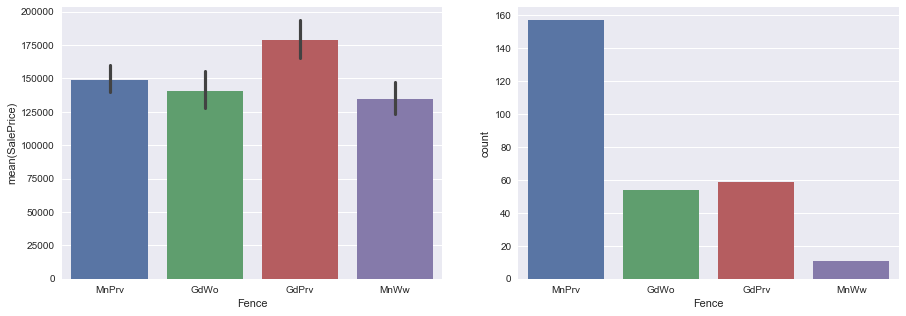

In [3071]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='Fence',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='Fence',
    data=train,
    ax=ax2
)

#### MiscFeature / MiscVal

    - Categorical
    - Nominal
    - Use dummies, drop NaN dummies
    - manually multiply MiscVal to respective MiscFeature dummies

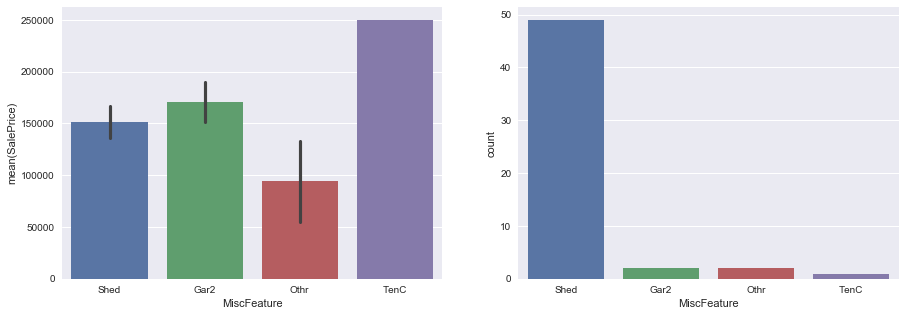

In [3072]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='MiscFeature',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='MiscFeature',
    data=train,
    ax=ax2
)

#### SaleType

    - Categorical
    - Nominal
    - Group those are not 'WD', 'New', 'COD' as 'others'
    - fill NaN with 'others'
    - Use dummies

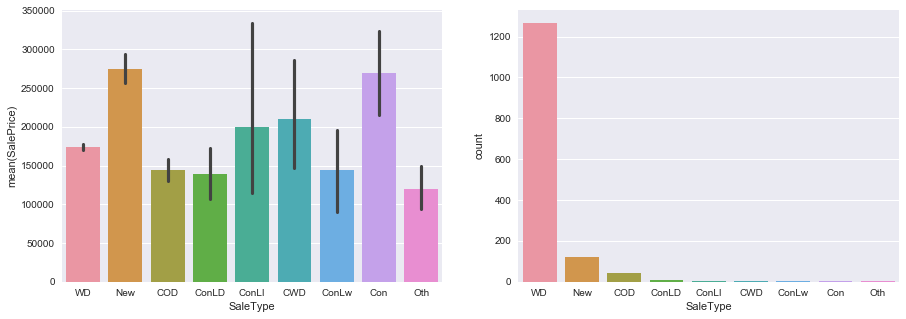

In [3073]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='SaleType',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='SaleType',
    data=train,
    ax=ax2
)

In [3074]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['SaleType'] != 'WD') & (dataset['SaleType'] != 'New') & (dataset['SaleType'] != 'COD'),
        'SaleType'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

#### SaleCondition

    - Categorical
    - Nominal
    - Group those are not 'Normal', 'Abnorml', 'Partial' as 'others'
    - fill NaN with 'others'
    - Use dummies

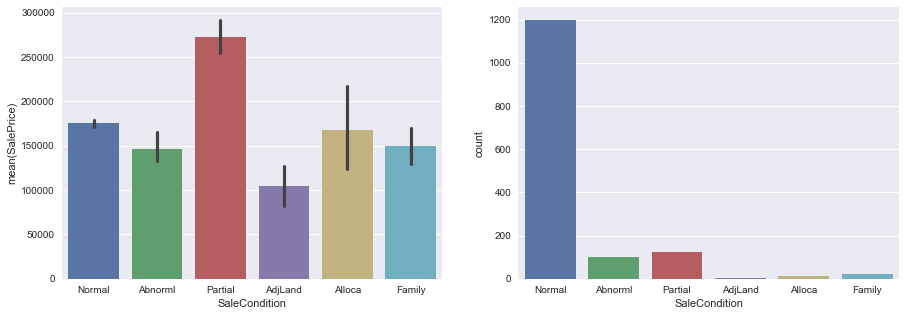

In [3075]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.barplot(
    x='SaleCondition',
    y='SalePrice',
    data=train,
    ax=ax1
)
sns.countplot(
    x='SaleCondition',
    data=train,
    ax=ax2
)

In [3076]:
for dataset in datasets:
    
    dataset.loc[
        (dataset['SaleCondition'] != 'Normal') & (dataset['SaleCondition'] != 'Abnorml') & (dataset['SaleCondition'] != 'Partial'),
        'SaleCondition'
    ] = 'others'
    
datasets = [train, test]
complete = pd.concat(datasets)

In [3077]:
print(train.columns)
print(complete['SaleCondition'].isnull().any())
complete['SaleCondition']

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
5        Normal
6        Normal
7        Normal
8       Abnorml
9        Normal
10       Normal
11      Partial
12       Normal
13      Partial
14       Normal
15       Normal
16       Normal
17       Normal
18       Normal
19      Abnorml
20      Partial
21       Normal
22       Normal
23       Normal
24       Normal
25       Normal
26       Normal
27       Normal
28       Normal
29       Normal
         ...   
1429     Normal
1430     Normal
1431    Abnorml
1432    Abnorml
1433     Normal
1434    Partial
1435     Normal
1436     Normal
1437     Normal
1438     Normal
1439     Normal
1440     others
1441     Normal
1442    Partial
1443    Partial
1444     Normal
1445     Normal
1446     Normal
1447     Normal
1448     Normal
1449     Normal
1450     Normal
1451     Normal
1452    Abnorml
1453     Normal
1454     Normal
1455    Abnorml
1456    Abnorml
1457     Normal
1458     Normal
Name: SaleCondition, dty

In [3078]:
summerize = pd.DataFrame({
    'Features': train.columns[1:80],
    'ignore': [
        False, False, False, False, False, False, False, False, False, False,
        False, False, True, True, False, False, True, True, True, True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, True, False, True, True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, True, True, True, False, False
    ],
    'isCategorical': [
        False, True, False, False, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, False, False,
        True, True, True, True, True, False, True, True, True, True,
        True, True, True, False, True, False, False, False, True, True,
        True, True, False, False, False, False, False, False, False, False, 
        False, False, True, False, True, False, True, True, False, True,
        False, False, True, True, True, False, False, False, False, False,
        False, True, True, True, False, False, False, True, True
    ],
    'isOrdinal': [
        None, True, None, None, False, False, False, False, True, False,
        False, True, False, False, False, False, True, True, False, False,
        False, False, False, False, False, False, True, True, False, True,
        True, True, True, False, True, False, False, False, False, True,
        True, False, False, False, False, False, False, False, False, False,
        False, False, True, False, False, False, True, False, False, True,
        False, False, True, True, True, False, False, False, False, False,
        False, True, False, False, False, False, False, False, False
    ],
    'hasNaN': [
        complete[col].isnull().any() for col in train.columns[1:80]
    ],
    'fillNaNMethod': [
        None, 'frequent', 'median', None, None, None, None, None, 'frequent', None,
        None, None, None, None, None, None, None, None, None, None,
        None, None, 'frequent', 'frequent', 'frequent', 'median', None, None, None, None,
        None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, 'frequent', 'frequent', None, None,
        None, None, None, None, None, None, None, None, -1, None,
        None, None, None, None, None, None, None, None, None, None,
        None, None, None, None, None, None, None, None, None
    ],
    'mapping': [
        None, mszoning_map, None, None, street_map, None, None, None, utilities_map, None,
        landslope_map, neighborhood_map, None, None, bldgtype_map, None, None, None, None, None,
        None, roofmatl_map, None, None, None, None, exter_map, exter_map, None, bsmt_map,
        bsmt_map, bsmtexposure_map, bsmtfintype_map, None, bsmtfintype_map, None, None, None, heating_map, heatingqc_map,
        centralair_map, electrical_map, None, None, None, None, None, None, None, None,
        None, None, kitchenqual_map, None, functional_map, None, fireplacequ_map, None, None, garagefinish_map,
        None, None, garage_map, garage_map, paveddrive_map, None, None, None, None, None,
        None, poolqc_map, None, None, None, None, None, None, None
    ],
    'useDummies': [
        False, False, False, False, False, True, True, True, False, True,
        False, False, True, True, False, True, False, False, False, False,
        True, False, False, False, True, False, False, False, True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, True, True, False, False, False, True, True
    ]
})
summerize

,Features,fillNaNMethod,hasNaN,ignore,isCategorical,isOrdinal,mapping,useDummies
0,MSSubClass,None,False,False,False,None,None,False
1,MSZoning,frequent,True,False,True,True,"{'C (all)': 0, 'RM': 1, 'RL': 3, 'FV': 4, 'RH'...",False
2,LotFrontage,median,True,False,False,None,None,False
3,LotArea,None,False,False,False,None,None,False
4,Street,None,False,False,True,False,"{'Grvl': 0, 'Pave': 1}",False
5,Alley,None,True,False,True,False,None,True
6,LotShape,None,False,False,True,False,None,True
7,LandContour,None,False,False,True,False,None,True
8,Utilities,frequent,True,False,True,True,"{'AllPub': 1, 'NoSeWa': 0}",False
9,LotConfig,None,False,False,True,False,None,True


### Process Data

In [3079]:
for idx, row in summerize.iterrows():

    feature = row['Features']
    
    print('Now dealing with {feature}'.format(feature=feature))
    
    method = row['fillNaNMethod']
    mapping = row['mapping']
    
    if not row['ignore']:
    
        if row['hasNaN'] and method:

            fill = None
        
            if  method == 'frequent':                    
                fill = train[feature].mode()[0]
            elif method == 'median':
                fill = train[feature].dropna().median()
            else:
                fill = method
                    
            for dataset in datasets:
                        
                dataset[feature].fillna(fill, inplace=True)
    
    
        if row['isCategorical']:
          
            if mapping:
            
                for dataset in datasets:
                
                    dataset[feature] = dataset[feature].map(mapping).astype(np.int)
                
            elif row['useDummies']:
                           
                dummies = pd.get_dummies(
                    complete[feature],
                    prefix=feature,
                    dummy_na=complete[feature].isnull().any()
                )
                train_dummies, test_dummies = np.split(dummies, [len(train.index)], axis=0)
                train = train.join(train_dummies)
                test = test.join(test_dummies)
                train = train.drop(feature, axis=1)
                test = test.drop(feature, axis=1)
                datasets = [train, test]
                complete = pd.concat(datasets)
        
        else:
        
            pass
    
        
# train[summerize['Features']].head(30)
# test.filter(regex=('LotShape*'))

Now dealing with MSSubClass
Now dealing with MSZoning
Now dealing with LotFrontage
Now dealing with LotArea
Now dealing with Street
Now dealing with Alley
Now dealing with LotShape
Now dealing with LandContour
Now dealing with Utilities
Now dealing with LotConfig
Now dealing with LandSlope
Now dealing with Neighborhood
Now dealing with Condition1
Now dealing with Condition2
Now dealing with BldgType
Now dealing with HouseStyle
Now dealing with OverallQual
Now dealing with OverallCond
Now dealing with YearBuilt
Now dealing with YearRemodAdd
Now dealing with RoofStyle
Now dealing with RoofMatl
Now dealing with Exterior1st
Now dealing with Exterior2nd
Now dealing with MasVnrType
Now dealing with MasVnrArea
Now dealing with ExterQual
Now dealing with ExterCond
Now dealing with Foundation
Now dealing with BsmtQual
Now dealing with BsmtCond
Now dealing with BsmtExposure
Now dealing with BsmtFinType1
Now dealing with BsmtFinSF1
Now dealing with BsmtFinType2
Now dealing with BsmtFinSF2
Now dea

#### Manually process 'Condition1' and  'Condition2' columns

In [3080]:
condition_dummies = pd.get_dummies(
    complete['Condition1'],
    prefix='Condition',
    dummy_na=False
)
condition2_dummies = pd.get_dummies(
    complete['Condition2'],
    prefix='Condition2',
    dummy_na=False
)

In [3081]:
condition_dummies.head()

,Condition_Artery,Condition_Feedr,Condition_Norm,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [3082]:
condition2_dummies.head()

,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [3083]:
for col in condition_dummies.columns:
    col2 = col[:9] + '2' + col[9:]
    try:
        condition_dummies[col] = condition_dummies[col] | condition2_dummies[col2]
    except KeyError:
        pass

In [3084]:
# Norm seems not so important for using dummies
condition_dummies = condition_dummies.drop(['Condition_Norm'], axis=1)

train_condition_dummies, test_condition_dummies = np.split(condition_dummies, [len(train.index)], axis=0)
train = train.join(train_condition_dummies)
test = test.join(test_condition_dummies)
train = train.drop(['Condition1', 'Condition2'], axis=1)
test = test.drop(['Condition1', 'Condition2'], axis=1)
datasets = [train, test]
complete = pd.concat(datasets)
complete.filter(regex=('^Condition*'))

,Condition_Artery,Condition_Feedr,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,Condition_RRNe,Condition_RRNn
0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0


In [3085]:
conditions = complete.filter(regex=('^Condition*'))
conditions.sum()

Condition_Artery     95
Condition_Feedr     173
Condition_PosA       21
Condition_PosN       39
Condition_RRAe       29
Condition_RRAn       51
Condition_RRNe        6
Condition_RRNn       11
dtype: int64

#### Manually process 'Exterior1st' and 'Exterior2nd' columns

In [3086]:
extorior_dummies = pd.get_dummies(
    complete['Exterior1st'],
    prefix='Exterior',
    dummy_na=False
)
extorior2_dummies = pd.get_dummies(
    complete['Exterior2nd'],
    prefix='Exterior2',
    dummy_na=False
)

In [3087]:
extorior_dummies.head()

,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3088]:
extorior2_dummies.head()

,Exterior2_AsbShng,Exterior2_AsphShn,Exterior2_Brk Cmn,Exterior2_BrkFace,Exterior2_CBlock,Exterior2_CmentBd,Exterior2_HdBoard,Exterior2_ImStucc,Exterior2_MetalSd,Exterior2_Other,Exterior2_Plywood,Exterior2_Stone,Exterior2_Stucco,Exterior2_VinylSd,Exterior2_Wd Sdng,Exterior2_Wd Shng
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3089]:
extorior_dummies['Exterior_Other'] = extorior2_dummies['Exterior2_Other']
extorior_dummies['Exterior_Wd Shng'] = extorior2_dummies['Exterior2_Wd Shng']

In [3090]:
for col in condition_dummies.columns:
    col2 = col[:8] + '2' + col[8:]
    try:
        condition_dummies[col] = condition_dummies[col] | condition2_dummies[col2]
    except KeyError:
        pass

In [3091]:
train_extorior_dummies, test_extorior_dummies = np.split(extorior_dummies, [len(train.index)], axis=0)
train = train.join(train_extorior_dummies)
test = test.join(test_extorior_dummies)
train = train.drop(['Exterior1st', 'Exterior2nd'], axis=1)
test = test.drop(['Exterior1st', 'Exterior2nd'], axis=1)
datasets = [train, test]
complete = pd.concat(datasets)
complete.filter(regex=('Exterior*'))

,Exterior_AsbShng,Exterior_AsphShn,Exterior_BrkComm,Exterior_BrkFace,Exterior_CBlock,Exterior_CemntBd,Exterior_HdBoard,Exterior_ImStucc,Exterior_MetalSd,Exterior_Other,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_Wd Shng,Exterior_WdShing
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Manually process BsmtFinSF1 / BsmtFinType1 / BsmtFinSF2 / BsmtFinType2 / BsmtUnfSF columns

In [3092]:
for dataset in datasets:
    
    dataset['BsmtFinScore'] = dataset['BsmtFinType1'] * dataset['BsmtFinSF1'] + dataset['BsmtFinType2'] * dataset['BsmtFinSF2']
    
train = train.drop(['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)
test = test.drop(['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1)

datasets = [train, test]
complete = pd.concat(datasets)
complete.filter(regex=('BsmtFin*'))

,BsmtFinScore
0,4236.0
1,4890.0
2,2916.0
3,1080.0
4,3930.0
5,4392.0
6,8214.0
7,4423.0
8,0.0
9,5106.0


#### Manually process MiscFeature / MiscVal

In [3093]:
misc_features = ['MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']

for dataset in datasets:
    
    for misc_feature in misc_features:
    
        dataset[misc_feature] = dataset[misc_feature].multiply(dataset['MiscVal'])

train = train.drop(['MiscFeature_nan', 'MiscVal'], axis=1)
test = test.drop(['MiscFeature_nan', 'MiscVal'], axis=1)

datasets = [train, test]
complete = pd.concat(datasets)

In [3094]:
complete.filter(regex=('Misc*'))

,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,700,0
6,0,0,0,0
7,0,0,350,0
8,0,0,0,0
9,0,0,0,0


#### Manually process MoSold / YrSold

In [3095]:
train['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [3096]:
for dataset in datasets:
    
    dataset['YrSold'] = dataset['YrSold'].add((dataset['MoSold'] - 0.5) / 12)

train = train.drop(['MoSold'], axis=1)
test = test.drop(['MoSold'], axis=1)

datasets = [train, test]
complete = pd.concat(datasets)

In [3097]:
complete.filter(regex=('YrSold'))

,YrSold
0,2008.125000
1,2007.375000
2,2008.708333
3,2006.125000
4,2008.958333
5,2009.791667
6,2007.625000
7,2009.875000
8,2008.291667
9,2008.041667


### Data standardization

In [3098]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LandSlope,Neighborhood,BldgType,...,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Exterior_Other,Exterior_Wd Shng,BsmtFinScore
0,1,60,3,65.0,8450,1,1,1,17,1,...,0,0,0,0,1,0,0,0,0,4236
1,2,20,3,80.0,9600,1,1,1,21,1,...,1,0,0,0,0,0,0,0,0,4890
2,3,60,3,68.0,11250,1,1,1,17,1,...,0,0,0,0,1,0,0,0,0,2916
3,4,70,3,60.0,9550,1,1,1,18,1,...,0,0,0,0,0,1,0,0,1,1080
4,5,60,3,84.0,14260,1,1,1,25,1,...,0,0,0,0,1,0,0,0,0,3930
5,6,50,3,85.0,14115,1,1,1,12,1,...,0,0,0,0,1,0,0,0,0,4392
6,7,20,3,75.0,10084,1,1,1,20,1,...,0,0,0,0,1,0,0,0,0,8214
7,8,60,3,69.0,10382,1,1,1,14,1,...,0,0,0,0,0,0,0,0,0,4423
8,9,50,1,51.0,6120,1,1,1,6,1,...,0,0,0,0,0,0,0,0,1,0
9,10,190,3,50.0,7420,1,1,1,4,0,...,1,0,0,0,0,0,0,0,0,5106


In [3099]:
test.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LandSlope,Neighborhood,BldgType,...,Exterior_MetalSd,Exterior_Plywood,Exterior_Stone,Exterior_Stucco,Exterior_VinylSd,Exterior_Wd Sdng,Exterior_WdShing,Exterior_Other,Exterior_Wd Shng,BsmtFinScore
0,1461,20,2,80.0,11622,1,1,1,11,1,...,0,0,0,0,1,0,0,0,0,1692.0
1,1462,20,3,81.0,14267,1,1,1,11,1,...,0,0,0,0,0,1,0,0,0,4615.0
2,1463,60,3,74.0,13830,1,1,1,15,1,...,0,0,0,0,1,0,0,0,0,4746.0
3,1464,60,3,78.0,9978,1,1,1,15,1,...,0,0,0,0,1,0,0,0,0,3612.0
4,1465,120,3,43.0,5005,1,1,1,23,0,...,0,0,0,0,0,0,0,0,0,1315.0
5,1466,60,3,75.0,10000,1,1,1,15,1,...,0,0,0,0,0,0,0,0,0,0.0
6,1467,20,3,69.0,7980,1,1,1,15,1,...,0,0,0,0,0,0,0,0,0,4675.0
7,1468,60,3,63.0,8402,1,1,1,15,1,...,0,0,0,0,1,0,0,0,0,0.0
8,1469,20,3,85.0,10176,1,1,1,15,1,...,0,0,0,0,0,0,0,0,0,3822.0
9,1470,20,3,70.0,8400,1,1,1,11,1,...,0,1,0,0,0,0,0,0,0,4254.0


In [3100]:
train.shape

(1460, 134)

In [3101]:
y = train['SalePrice']
x = train.drop(['Id', 'SalePrice'], axis=1)
x_test = test.drop(['Id'], axis=1)

stdsc = StandardScaler()
x_std = stdsc.fit_transform(x)
x_test_std = stdsc.fit_transform(x_test)
# datasets_std = [train_std, test_std]
# complete_std = pd.concat(datasets_std)

In [3102]:
forest_reg = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_features=2,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

In [3103]:
forest_reg = forest_reg.fit(x_std, y)

In [3104]:
forest_accuracy = round(forest_reg.score(x_std, y) * 100, 2)
forest_accuracy

97.609999999999999

In [3105]:
importances = forest_reg.feature_importances_
print(importances)
importance_rank = np.argsort(importances)[::-1]

[  8.86812996e-03   9.10593578e-03   2.16158545e-02   2.11561415e-02
   1.40666430e-04   7.28957572e-06   1.63360943e-03   4.26489625e-02
   2.68799054e-03   5.03379933e-02   9.05863098e-03   3.30131851e-02
   2.10087620e-02   1.99479426e-03   2.18331718e-02   1.33733219e-02
   2.54687405e-03   1.95972082e-02   3.48993419e-03   1.12336383e-02
   3.86666496e-02   8.48885182e-04   1.11475588e-02   4.13109564e-03
   3.21712897e-03   3.06904341e-02   2.23574984e-02   1.22151660e-03
   4.35806799e-02   6.15001587e-03   1.25056911e-03   2.03335897e-02
   7.44353917e-03   1.16187544e-02   1.57055341e-03   2.36353128e-02
   2.04249373e-02   1.62316770e-03   2.08062805e-02   2.63619553e-02
   2.10707066e-02   2.36663435e-02   3.23166971e-02   3.25247086e-02
   5.36665271e-03   2.68077989e-03   3.10006566e-03   1.31304458e-02
   2.40710082e-02   3.22160691e-03   6.77059240e-04   4.33859422e-03
   1.65910555e-03   2.14566361e-03   8.81975737e-03   1.14364567e-03
   4.83331122e-04   8.98548007e-04

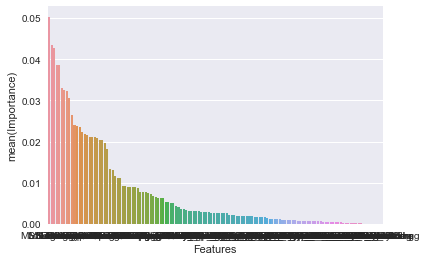

In [3108]:
sns.barplot(
    x='Features',
    y='Importance',
    data=pd.DataFrame(
        {
            'Features': list(x.columns),
            'Importance': [importances[r] for r in importance_rank]
        }
    )
)

In [3107]:
submission['SalePrice'] = forest_reg.predict(x_test)
submission.to_csv('submission.csv', index=False)